# **PROYECTO INDIVIDUAL 2 | DATATHON**

In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model 

### Ingesta de datos

Para empezar utilizaremos el metodo read_csv de pandas para importar los datasets en un dataframe y asi trabajar con python. Ademas cree 2 datasets con los archivos originales por si necesitaba consultarlos.

In [145]:
dftest = pd.read_csv("hospitalizaciones_test.csv")
dftrain = pd.read_csv("hospitalizaciones_train.csv")
dftestOriginal = pd.read_csv("hospitalizaciones_test.csv")
dftrainOriginal = pd.read_csv("hospitalizaciones_train.csv")

***

### ANALISIS DE LOS DATOS

A continuacion con una serie de metodos revisaremos nuestros dataframes.

In [ ]:
dftest.info() #Este metodo nos brinda informacion acerca del dataframe
dftest.isnull().sum() #Este metodo nos devuelve la cantidad de nulos por cada columna
dftest.head(10) #Este metodo nos devuelve los n primeros registros del dataframe

In [ ]:
dftrain.info() #Este metodo nos brinda informacion acerca del dataframe
dftrain.isnull().sum() #Este metodo nos devuelve la cantidad de nulos por cada columna
dftrain.head(10) #Este metodo nos devuelve los n primeros registros del dataframe

Como podemos observar, no existen valores faltantes en nuestro dataset. Ahora analizaremos los datos numericos.

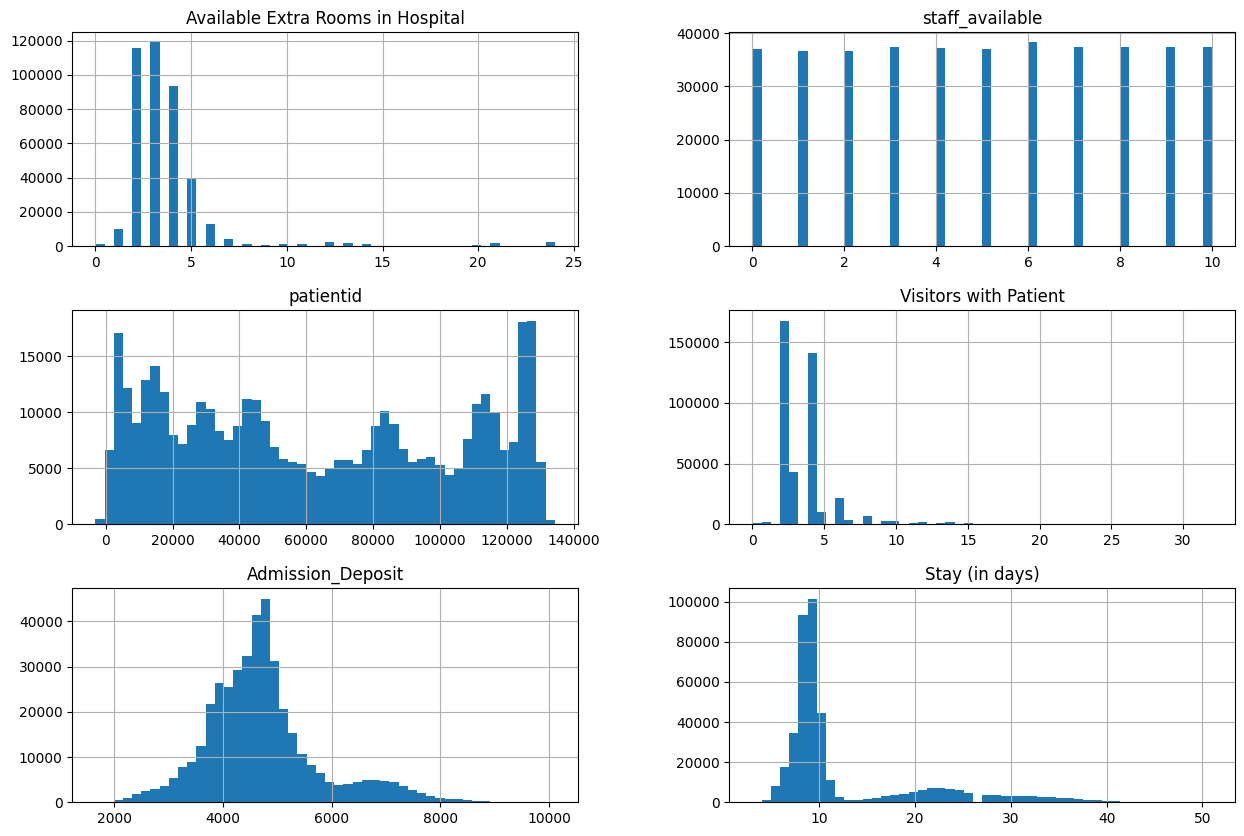

In [148]:
%matplotlib inline
dftrain.hist(bins=50, figsize=(15,10))
plt.show()

Podemos observar que:

- Generalmente las habitaciones extra disponibles en el hospital son 3-5.
- Los pacientes tambien suelen tener entre 3-5 visitas.
- El depósito de admisión se encuentra en mayor cantidad entre los 4000-6000 unidades monetarias.
- El periodo de estadía de un paciente es menor a 10 días, aunque tambien hay casos en los que supera los 10.

***

### NORMALIZACION

Cambiaremos los nombres de las columnas para facilitar nuestro trabajo y la comprension del mismo.

In [149]:
dftest.columns = ["habitacionesExtraDisponibles", "Departamento", "codigoSala", "Doctor", "staffDisponible", "idPaciente", "rangoEtario", "Genero", "tipoAdmision", "Gravedad", "condicionSalud", "Acompañantes", "seguroMedico", "depositoAdmision" ]
dftrain.columns = ["habitacionesExtraDisponibles", "Departamento", "codigoSala", "Doctor", "staffDisponible", "idPaciente", "rangoEtario", "Genero", "tipoAdmision", "Gravedad", "condicionSalud", "Acompañantes", "seguroMedico", "depositoAdmision", "Estadia" ]

***

### TRANSFORMACION DE DATOS

A continuacion asignaremos distintos valores numericos para la columna de genero. Le asignaremos un 0 a los pacientes masculinos, un 1 a los pacientes femeninos y un 2 a los pacientes identificados con "otro" genero.

In [150]:
diccionarioGenero = {"Male": 0, "Female": 1, "Other": 2}
dftest["generoNum"] = dftest.Genero.map(diccionarioGenero)
dftrain["generoNum"] = dftrain.Genero.map(diccionarioGenero)

Ahora asignaremos valores numericos para cada rango etario los pacientes. Asignaremos 0 a los pacientes que tengan entre 0 y 10 años, 1 a los pacientes que tengan entre 11 y 20, 2 a los pacientes que tengan entre 21 y 30, 3 a los pacientes que tengan entre 31 y 40, 4 a los pacientes que tengan entre 41 y 50, 5 a los pacientes que tengan entre 51 y 60, 6 a los pacientes que tengan entre 61 y 70, 7 a los pacientes que tengan entre 71 y 80, 8 a los pacientes que tengan entre 81 y 90 y 9 a los pacientes que tengan entre 91 y 100.

In [151]:
diccionarioRangoEtario = {"0-10": 0, "11-20": 1, "21-30": 2, "31-40": 3, "41-50": 4, "51-60": 5, "61-70":6, "71-80": 7, "81-90": 8, "91-100": 9}
dftest["rangoEtarioNum"] = dftest.rangoEtario.map(diccionarioRangoEtario)
dftrain["rangoEtarioNum"] = dftrain.rangoEtario.map(diccionarioRangoEtario)

Ahora insertaremos una columna la cual tenga un valor numerico para cada tipo de departamento.

In [152]:
diccionarioDepartamento = { "gynecology": 0, 'TB & Chest disease': 1, 'radiotherapy': 2, 'anesthesia': 3,
'surgery': 4 }
dftest["departamentoNum"] = dftest.Departamento.map(diccionarioDepartamento)
dftrain["departamentoNum"] = dftrain.Departamento.map(diccionarioDepartamento)

A continuacion, con one-hot encoding crearemos una columna para cada valor de la columna doctor y luego colocaremos en cada registro 0 o 1 segun si ese doctor es el que atendio al paciente o no. Para esto utilizaremos la funcion get_dummies de pandas.

In [153]:
dfOneHotTest = pd.get_dummies(dftest["Doctor"])
dftest = pd.concat([dftest, dfOneHotTest], axis = 1)
dfOneHotTrain = pd.get_dummies(dftrain["Doctor"])
dftrain = pd.concat([dftrain, dfOneHotTrain], axis = 1)


Insertamos una columna la cual indica un valor numerico para cada tipo de admision.

In [154]:
diccionarioAdmision = {'Trauma': 0, 'Urgent': 1, 'Emergency': 2}
dftest["admisionNum"] = dftest.tipoAdmision.map(diccionarioAdmision)
dftrain["admisionNum"] = dftrain.tipoAdmision.map(diccionarioAdmision)

Haremos lo mismo con la gravedad del paciente al ingresar.

In [155]:
diccionarioGravedad = {'Minor': 0, 'Moderate': 1, 'Extreme': 2}
dftest["gravedadNum"] = dftest.Gravedad.map(diccionarioGravedad)
dftrain["gravedadNum"] = dftrain.Gravedad.map(diccionarioGravedad)

A continuacion, con one-hot encoding crearemos una columna para cada valor de la columna condicion de salud y luego colocaremos en cada registro 0 o 1 segun si ese paciente tenia este problema de salud o no. Para esto utilizaremos la funcion get_dummies de pandas.

In [156]:

dfOneHotTest2 = pd.get_dummies(dftest["condicionSalud"])
dftest = pd.concat([dftest, dfOneHotTest2], axis = 1)
dfOneHotTrain2 = pd.get_dummies(dftrain["condicionSalud"])
dftrain = pd.concat([dftrain, dfOneHotTrain2], axis = 1)


Por ultimo, agregaremos una columna binaria segun el paciente tenga (0) o no (1) seguro medico.

In [157]:
diccionarioSeguro = {"Yes": 0, "No": 1, }
dftest["seguroMedicoNum"] = dftest.seguroMedico.map(diccionarioSeguro)
dftrain["seguroMedicoNum"] = dftrain.seguroMedico.map(diccionarioSeguro)

Finalmente, vamos a dropear de nuestro dataset aquellas columnas que ya estan representadas numericamente en otras y tambien las columnas que no tengan importancia para nuestro modelo.

In [158]:
dftest.drop(["Departamento"], axis=1, inplace= True)
dftrain.drop(["Departamento"], axis=1, inplace= True)
dftest.drop(["idPaciente"], axis=1, inplace= True)
dftrain.drop(["idPaciente"], axis=1, inplace= True)
dftest.drop(["codigoSala"], axis=1, inplace= True)
dftrain.drop(["codigoSala"], axis=1, inplace= True)
dftest.drop(["Doctor"], axis=1, inplace= True)
dftrain.drop(["Doctor"], axis=1, inplace= True)
dftest.drop(["rangoEtario"], axis=1, inplace= True)
dftrain.drop(["rangoEtario"], axis=1, inplace= True)
dftest.drop(["Genero"], axis=1, inplace= True)
dftrain.drop(["Genero"], axis=1, inplace= True)
dftest.drop(["tipoAdmision"], axis=1, inplace= True)
dftrain.drop(["tipoAdmision"], axis=1, inplace= True)
dftest.drop(["Gravedad"], axis=1, inplace= True)
dftrain.drop(["Gravedad"], axis=1, inplace= True)
dftest.drop(["condicionSalud"], axis=1, inplace= True)
dftrain.drop(["condicionSalud"], axis=1, inplace= True)
dftest.drop(["Acompañantes"], axis=1, inplace= True)
dftrain.drop(["Acompañantes"], axis=1, inplace= True)
dftest.drop(["seguroMedico"], axis=1, inplace= True)
dftrain.drop(["seguroMedico"], axis=1, inplace= True)
dftest.drop(["depositoAdmision"], axis=1, inplace= True)
dftrain.drop(["depositoAdmision"], axis=1, inplace= True)

In [159]:
dftest

,habitacionesExtraDisponibles,staffDisponible,generoNum,rangoEtarioNum,departamentoNum,Dr Isaac,Dr John,Dr Mark,Dr Nathan,Dr Olivia,...,Dr Sophia,admisionNum,gravedadNum,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other,seguroMedicoNum
0,3,10,1,2,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
1,2,4,1,5,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,2,7,2,5,2,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,2,1,1,2,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,2,7,1,5,3,0,1,0,0,0,...,0,0,2,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
89996,13,8,1,3,0,0,0,0,0,1,...,0,2,1,0,0,0,0,0,1,1
89997,2,3,1,1,0,0,0,0,0,0,...,0,2,1,0,0,0,1,0,0,1
89998,2,1,1,6,2,0,1,0,0,0,...,0,0,2,0,1,0,0,0,0,1


***

In [160]:
dftrain

,habitacionesExtraDisponibles,staffDisponible,Estadia,generoNum,rangoEtarioNum,departamentoNum,Dr Isaac,Dr John,Dr Mark,Dr Nathan,...,Dr Sophia,admisionNum,gravedadNum,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other,seguroMedicoNum
0,4,0,8,1,4,0,0,0,0,0,...,1,0,2,0,1,0,0,0,0,0
1,4,2,9,1,3,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,2,8,7,1,2,0,0,0,0,0,...,1,0,2,0,1,0,0,0,0,0
3,4,7,8,1,3,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
4,2,10,34,0,7,3,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,1,8,1,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
409996,5,5,9,1,2,0,0,0,0,1,...,0,0,2,0,0,0,0,0,1,1
409997,4,9,9,1,2,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
409998,10,10,9,1,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### MODELO DE MACHINE LEARNING | REGRESIÓN LOGISTICA

Utilizaremos un modelo de regresion logistica, para la cual importamos la libreria scikit learn. 

Aqui utilizamos la libreria para entrenar nuestro modelo con el dataframe train, luego utilizamos la funcion LogisticRegression. Finalmente realizamos la prediccion.

In [ ]:

X = (dftrain[['habitacionesExtraDisponibles', 'staffDisponible',
       'generoNum', 'rangoEtarioNum', 'departamentoNum', 'Dr Isaac', 'Dr John',
       'Dr Mark', 'Dr Nathan', 'Dr Olivia', 'Dr Sam', 'Dr Sarah', 'Dr Simon',
       'Dr Sophia', 'admisionNum', 'gravedadNum', 'Asthama', 'Diabetes',
       'Heart disease', 'High Blood Pressure', 'None', 'Other',
       'seguroMedicoNum']])
y = (dftrain["Estadia"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
model = LogisticRegression()
model.fit(X_train, y_train)
prediccion = model.predict(dftest)

Convertimos esta prediccion (un array) a un dataframe para poder seguir trabajando con pandas. Luego renombramos una columna pred en nuestro dataframe.

In [163]:
dfprediccion = pd.DataFrame(prediccion)

In [165]:
dfprediccion.columns = ["pred"]

In [166]:
dfprediccion["EstadiaLargaOCorta"] = np.where(dfprediccion["pred"]<=8, '0', '1')

In [167]:
dfprediccion.drop(["pred"], axis = 1, inplace= True)
dfprediccion.columns = ["pred"]

***

### Exportacion de datos

Exportamos a csv y quitamos el indice.

In [168]:
dfprediccion.to_csv("facupaccioretti.csv", index = False)